Original Class Distribution: Counter({1.0: 1655, 2.0: 295, 3.0: 176})
After SMOTE Class Distribution: Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

         1.0       0.98      0.86      0.92       353
         2.0       0.86      0.97      0.91       317
         3.0       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



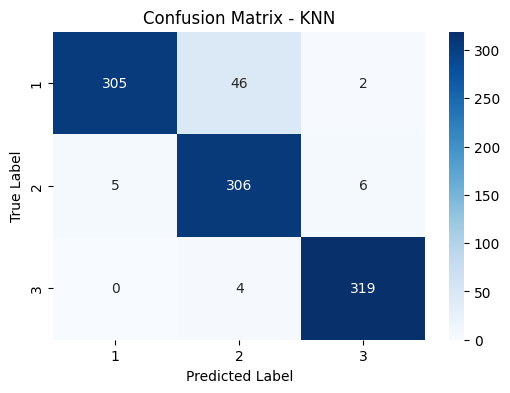


XGBoost - Accuracy: 93.55%
              precision    recall  f1-score   support

         1.0       0.98      0.88      0.93       353
         2.0       0.85      0.97      0.91       317
         3.0       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



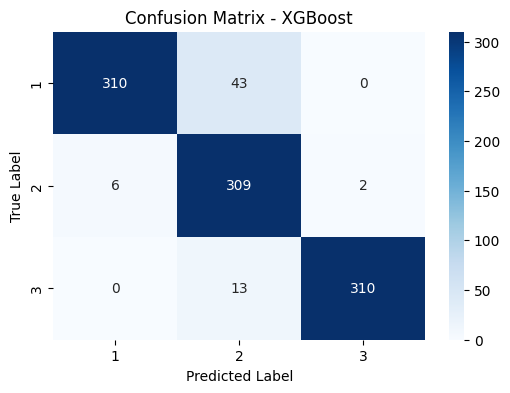


Random Forest - Accuracy: 95.57%
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       353
         2.0       0.89      0.99      0.93       317
         3.0       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



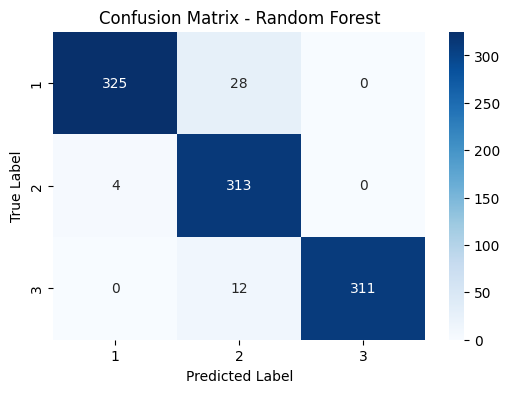


Gradient Boosting - Accuracy: 93.66%
              precision    recall  f1-score   support

         1.0       0.98      0.88      0.93       353
         2.0       0.85      0.97      0.91       317
         3.0       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



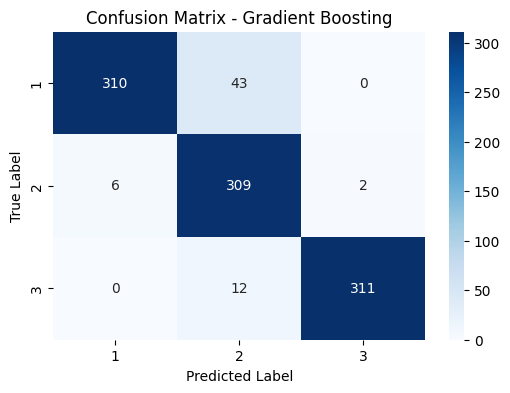


Ensemble Model - Accuracy: 96.07%
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       353
         2.0       0.90      0.99      0.94       317
         3.0       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993

Predicted Class Number: 1.0
Predicted Class Name: Normal


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (replace with actual dataset)
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display new class distribution after SMOTE
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return predictions

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.full(y.shape, np.mean(y))
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), np.mean(y_train))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0))

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.full(y.shape, np.mean(y))
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), np.mean(y_train))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # --------------------------------------
# ✅ Manual Ensembling (Majority Voting)
# --------------------------------------
y_pred_ensemble = []
for i in range(len(y_test)):
    votes = [predictions[model][i] for model in models]
    y_pred_ensemble.append(Counter(votes).most_common(1)[0][0])

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble) * 100
print(f"\nEnsemble Model - Accuracy: {ensemble_accuracy:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

new_data_class_2 = pd.DataFrame({
    'baseline value': [133],  # Higher baseline value, could be indicative of a different class
    'accelerations': [0.003],  # Acceleration might be higher for class 2
    'fetal_movement': [0],  # Slightly more fetal movement
    'uterine_contractions': [0.008],  # Uterine contractions might be more frequent for class 2
    'light_decelerations': [0.003],  # Slightly more decelerations
    'severe_decelerations': [0],  # Mild severe deceleration
    'prolongued_decelerations': [0],  # Prolonged decelerations slightly higher
    'abnormal_short_term_variability': [16],  # Short term variability higher
    'mean_value_of_short_term_variability': [2.1],  # Increased mean value
    'percentage_of_time_with_abnormal_long_term_variability': [0],  # More time with abnormal long-term variability
    'mean_value_of_long_term_variability': [13.4],  # Increased mean value for long-term variability
    'histogram_width': [130],  # Wider histogram could indicate different characteristics
    'histogram_min': [68],
    'histogram_max': [198],  # Higher maximum could indicate a different class
    'histogram_number_of_peaks': [5],  # More peaks in the histogram
    'histogram_number_of_zeroes': [1],  # More zeros might correlate with different patterns
    'histogram_mode': [141],  # Mode might be higher
    'histogram_mean': [135],  # Higher mean value
    'histogram_median': [138],  # Higher median
    'histogram_variance': [13],  # More variance
    'histogram_tendency': [0]  # Slightly more tendency
})
# Class labels mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Scale the new data using the fitted scaler
# Convert DataFrame to NumPy array before scaling
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# Predict using individual models
model_predictions = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

# Majority voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# Get class name from class_labels dictionary
predicted_class_name = class_labels[final_prediction]

# Print final result
print(f"Predicted Class Number: {final_prediction}")
print(f"Predicted Class Name: {predicted_class_name}")



Original Class Distribution: Counter({1.0: 1655, 2.0: 295, 3.0: 176})
After SMOTE Class Distribution: Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

         1.0       0.98      0.86      0.92       353
         2.0       0.86      0.97      0.91       317
         3.0       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



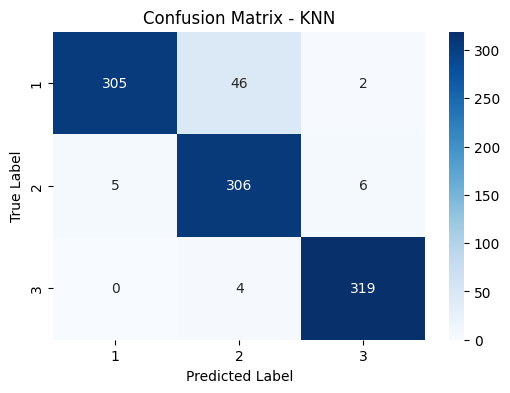


XGBoost - Accuracy: 93.66%
              precision    recall  f1-score   support

         1.0       0.98      0.88      0.93       353
         2.0       0.85      0.97      0.91       317
         3.0       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



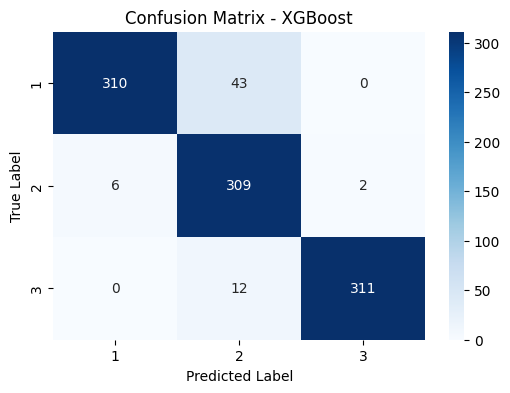


Random Forest - Accuracy: 95.77%
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.96       353
         2.0       0.89      0.99      0.94       317
         3.0       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



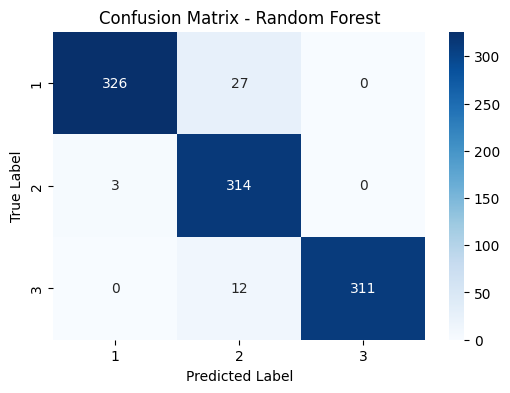


Gradient Boosting - Accuracy: 93.66%
              precision    recall  f1-score   support

         1.0       0.98      0.88      0.93       353
         2.0       0.85      0.97      0.91       317
         3.0       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



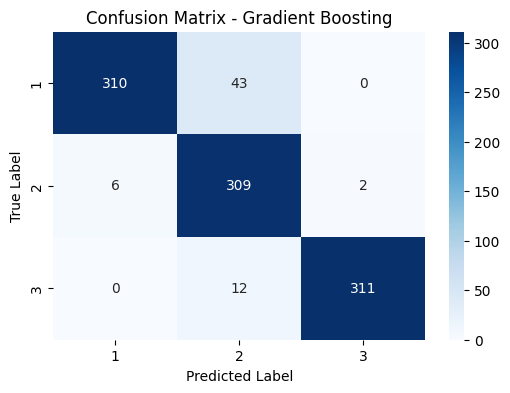


Ensemble Model - Accuracy: 96.27%
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.96       353
         2.0       0.90      0.99      0.94       317
         3.0       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.97      0.96      0.96       993

Predicted Class Number: 2.0
Predicted Class Name: Suspect


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (replace with actual dataset)
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display new class distribution after SMOTE
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return predictions

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.full(y.shape, np.mean(y))
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), np.mean(y_train))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0))

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.full(y.shape, np.mean(y))
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), np.mean(y_train))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # --------------------------------------
# ✅ Manual Ensembling (Majority Voting)
# --------------------------------------
y_pred_ensemble = []
for i in range(len(y_test)):
    votes = [predictions[model][i] for model in models]
    y_pred_ensemble.append(Counter(votes).most_common(1)[0][0])

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble) * 100
print(f"\nEnsemble Model - Accuracy: {ensemble_accuracy:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

new_data_class_2 = pd.DataFrame({
    'baseline value': [120],  # Higher baseline value, could be indicative of a different class
    'accelerations': [0],  # Acceleration might be higher for class 2
    'fetal_movement': [0],  # Slightly more fetal movement
    'uterine_contractions': [0],  # Uterine contractions might be more frequent for class 2
    'light_decelerations': [0],  # Slightly more decelerations
    'severe_decelerations': [0],  # Mild severe deceleration
    'prolongued_decelerations': [0],  # Prolonged decelerations slightly higher
    'abnormal_short_term_variability': [73],  # Short term variability higher
    'mean_value_of_short_term_variability': [0.5],  # Increased mean value
    'percentage_of_time_with_abnormal_long_term_variability': [43],  # More time with abnormal long-term variability
    'mean_value_of_long_term_variability': [2.4],  # Increased mean value for long-term variability
    'histogram_width': [64],  # Wider histogram could indicate different characteristics
    'histogram_min': [62],
    'histogram_max': [126],  # Higher maximum could indicate a different class
    'histogram_number_of_peaks': [2],  # More peaks in the histogram
    'histogram_number_of_zeroes': [0],  # More zeros might correlate with different patterns
    'histogram_mode': [120],  # Mode might be higher
    'histogram_mean': [137],  # Higher mean value
    'histogram_median': [121],  # Higher median
    'histogram_variance': [73],  # More variance
    'histogram_tendency': [1]  # Slightly more tendency
})
# Class labels mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Scale the new data using the fitted scaler
# Convert DataFrame to NumPy array before scaling
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# Predict using individual models
model_predictions = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

# Majority voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# Get class name from class_labels dictionary
predicted_class_name = class_labels[final_prediction]

# Print final result
print(f"Predicted Class Number: {final_prediction}")
print(f"Predicted Class Name: {predicted_class_name}")



Original Class Distribution: Counter({1.0: 1655, 2.0: 295, 3.0: 176})
After SMOTE Class Distribution: Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

         1.0       0.98      0.86      0.92       353
         2.0       0.86      0.97      0.91       317
         3.0       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



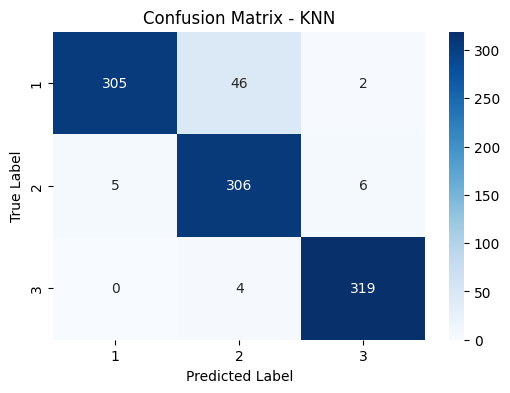


XGBoost - Accuracy: 93.66%
              precision    recall  f1-score   support

         1.0       0.98      0.88      0.93       353
         2.0       0.85      0.97      0.91       317
         3.0       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



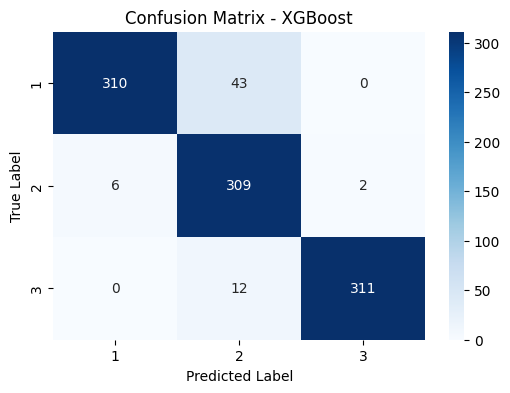


Random Forest - Accuracy: 95.67%
              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       353
         2.0       0.89      0.99      0.94       317
         3.0       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



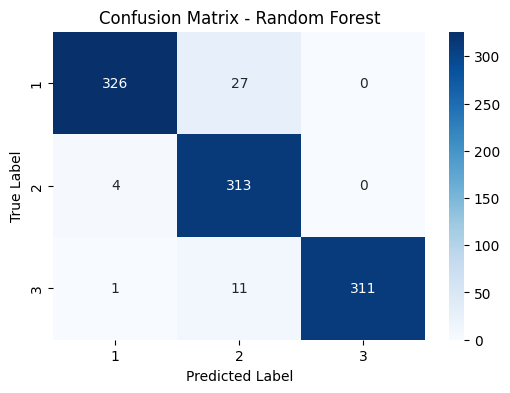


Gradient Boosting - Accuracy: 93.66%
              precision    recall  f1-score   support

         1.0       0.98      0.88      0.93       353
         2.0       0.85      0.97      0.91       317
         3.0       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



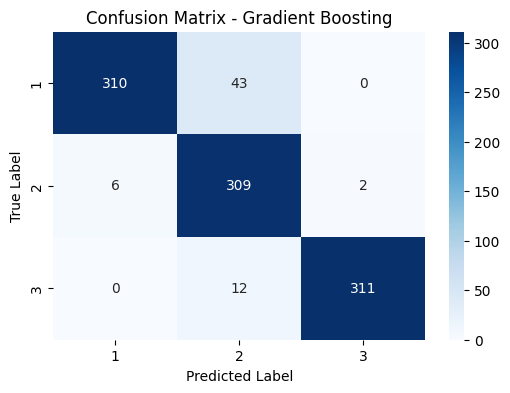


Ensemble Model - Accuracy: 96.07%
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       353
         2.0       0.89      0.99      0.94       317
         3.0       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993

Predicted Class Number: 3.0
Predicted Class Name: Pathological


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (replace with actual dataset)
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display new class distribution after SMOTE
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return predictions

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.full(y.shape, np.mean(y))
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), np.mean(y_train))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0))

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.full(y.shape, np.mean(y))
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), np.mean(y_train))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # --------------------------------------
# ✅ Manual Ensembling (Majority Voting)
# --------------------------------------
y_pred_ensemble = []
for i in range(len(y_test)):
    votes = [predictions[model][i] for model in models]
    y_pred_ensemble.append(Counter(votes).most_common(1)[0][0])

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble) * 100
print(f"\nEnsemble Model - Accuracy: {ensemble_accuracy:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

new_data_class_2 = pd.DataFrame({
   'baseline value': [134],  # Higher baseline value, could be indicative of a different class
    'accelerations': [0.001],  # Acceleration might be higher for class 2
    'fetal_movement': [0],  # Slightly more fetal movement
    'uterine_contractions': [0.013],  # Uterine contractions might be more frequent for class 2
    'light_decelerations': [0.008],  # Slightly more decelerations
    'severe_decelerations': [0],  # Mild severe deceleration
    'prolongued_decelerations': [0.003],  # Prolonged decelerations slightly higher
    'abnormal_short_term_variability': [29],  # Short term variability higher
    'mean_value_of_short_term_variability': [6.3],  # Increased mean value
    'percentage_of_time_with_abnormal_long_term_variability': [0],  # More time with abnormal long-term variability
    'mean_value_of_long_term_variability': [0],  # Increased mean value for long-term variability
    'histogram_width': [150],  # Wider histogram could indicate different characteristics
    'histogram_min': [50],
    'histogram_max': [200],  # Higher maximum could indicate a different class
    'histogram_number_of_peaks': [6],  # More peaks in the histogram
    'histogram_number_of_zeroes': [3],  # More zeros might correlate with different patterns
    'histogram_mode': [71],  # Mode might be higher
    'histogram_mean': [107],  # Higher mean value
    'histogram_median': [106],  # Higher median
    'histogram_variance': [215],  # More variance
    'histogram_tendency': [0]  # Slightly more tendency
})
# Class labels mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Scale the new data using the fitted scaler
# Convert DataFrame to NumPy array before scaling
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# Predict using individual models
model_predictions = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

# Majority voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# Get class name from class_labels dictionary
predicted_class_name = class_labels[final_prediction]

# Print final result
print(f"Predicted Class Number: {final_prediction}")
print(f"Predicted Class Name: {predicted_class_name}")

